#Final Project
- Wayne Lopez
- Statistical Machine Learning (MATH 475)

# Data Exploration & Preprocessing

The Weather Forecast dataset contains weather observations for 2500 days with 6 different features per day (temperature, humidity, wind speed, cloud coverage, pressure, and whether it rained that day or not).

In [52]:
## Use Pandas to read the CSV file.
import pandas as pd
import seaborn as sns

data = pd.read_csv('weather_forecast_data.csv')
dataset = data.copy()

In [53]:
## Checking Dataset Dimensions
print("Dimensions:", dataset.shape)

## Checking Dataset Feature Names
print("Feature Names:", ", ".join(dataset.columns[:6].tolist()))

Dimensions: (2500, 6)
Feature Names: Temperature, Humidity, Wind_Speed, Cloud_Cover, Pressure, Rain


In [54]:
## Checking Dataset Types
dataset.dtypes

,0
Temperature,float64
Humidity,float64
Wind_Speed,float64
Cloud_Cover,float64
Pressure,float64
Rain,object


In [55]:
## Checking Dataset Inital Rows
dataset.head(10)

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain
5,26.147353,48.217260,15.258547,59.766279,1049.738751,no rain
6,20.939680,40.799444,2.232566,45.827508,1014.173766,no rain
7,32.294325,51.848471,2.873621,92.551497,1006.041733,no rain
8,34.091569,48.057114,5.570206,82.524873,993.732047,no rain
9,19.586038,82.978293,5.760537,98.014450,1036.503457,rain


Before beginning visualization, I did early preprocessing by checking the dataset for any missing values or outliers within each feature in which none were found for either.

In [56]:
## Handling missing values
# Checking for missing values
dataset.isnull().sum()

# Filling missing values with features mean
#dataset['feature'].fillna(dataset['feature'].mean(), inplace=True)

,0
Temperature,0
Humidity,0
Wind_Speed,0
Cloud_Cover,0
Pressure,0
Rain,0


In [57]:
## Handling potential outliers.
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Function to handle outliers using IQR for a given feature
def handle_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]

    # Print info about the outliers
    print(f"Outliers for {feature}: {outliers}\n")

    return data

# Identify numerical features
numerical_features = dataset.select_dtypes(include=['number']).columns

# Process each numerical feature
for feature in numerical_features:
    dataset = handle_outliers_iqr(dataset, feature)

Outliers for Temperature: Empty DataFrame
Columns: [Temperature, Humidity, Wind_Speed, Cloud_Cover, Pressure, Rain]
Index: []

Outliers for Humidity: Empty DataFrame
Columns: [Temperature, Humidity, Wind_Speed, Cloud_Cover, Pressure, Rain]
Index: []

Outliers for Wind_Speed: Empty DataFrame
Columns: [Temperature, Humidity, Wind_Speed, Cloud_Cover, Pressure, Rain]
Index: []

Outliers for Cloud_Cover: Empty DataFrame
Columns: [Temperature, Humidity, Wind_Speed, Cloud_Cover, Pressure, Rain]
Index: []

Outliers for Pressure: Empty DataFrame
Columns: [Temperature, Humidity, Wind_Speed, Cloud_Cover, Pressure, Rain]
Index: []



To begin the visualization process, I split the datasets features between categorical and numerical features as they will contain different properties that need to be handled seperately.

In [58]:
## Identifying categorical vs. Numerical Features
# Identifying categorical features
categorical_features = dataset.select_dtypes(include=['object']).columns
print('Categorical Features:', categorical_features)

# Identifying numerical features
numerical_features = dataset.select_dtypes(include=['number']).columns
print('Numerical Features:', numerical_features)

Categorical Features: Index(['Rain'], dtype='object')
Numerical Features: Index(['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure'], dtype='object')


I visualized the distributions of the datesets numerical features (temperature, humidity, wind speed, cloud coverage, and pressure), finding that the distributions appeared mostly bell-shaped (normal), indicating a generally even distribution of values across their respective ranges. However, some features, such as 'pressure', exhibited slight skewness.

In [59]:
## Numerical Features: Generate summary statistics.
numerical_features = dataset.select_dtypes(include=['number'])
summary_stats = numerical_features.describe()
print(summary_stats)

       Temperature     Humidity   Wind_Speed  Cloud_Cover     Pressure
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000
mean     22.581725    64.347094     9.906255    49.658104  1014.312336
std       7.326996    19.954739     5.780316    29.123104    20.196433
min      10.001842    30.005071     0.009819     0.015038   980.014486
25%      16.359398    47.339815     4.761909    23.900016   996.938630
50%      22.536448    63.920797     9.908572    49.488284  1013.433035
75%      28.976476    81.561021    14.948408    75.324140  1031.735067
max      34.995214    99.997481    19.999132    99.997795  1049.985593


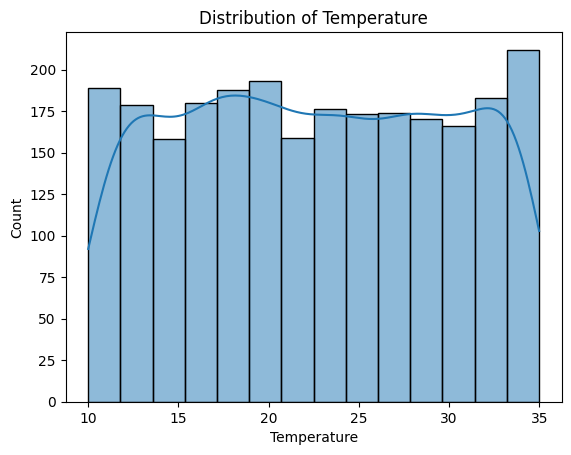

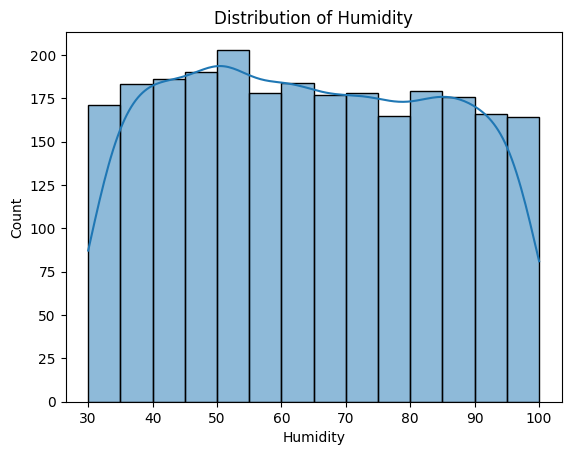

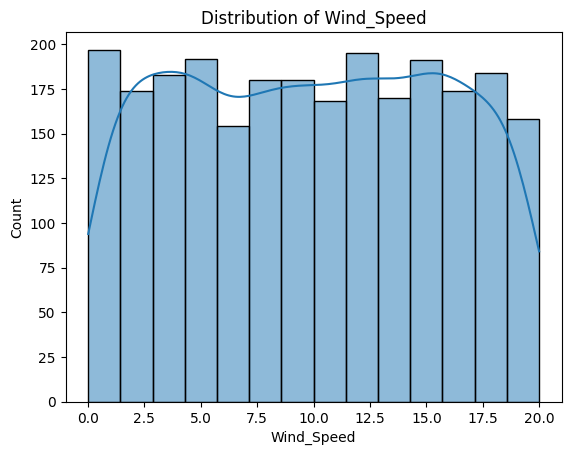

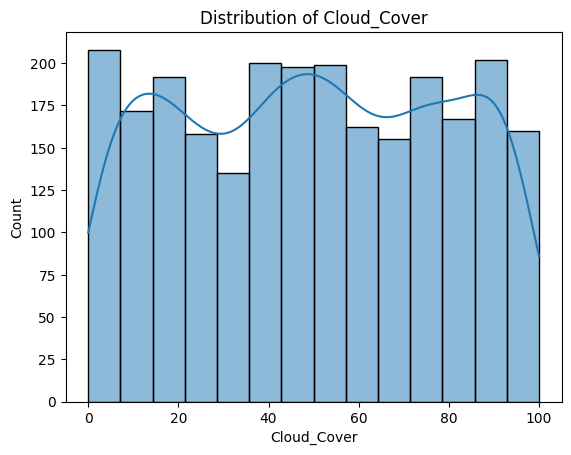

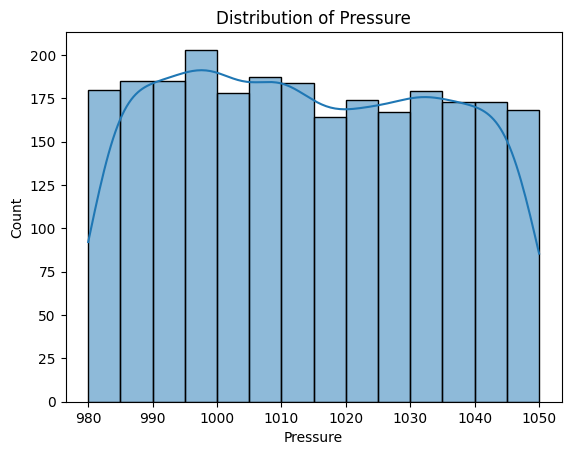

In [60]:
## Numerical Features: Visualize distributions.
import seaborn as sns
import matplotlib.pyplot as plt

for feature in numerical_features:
    sns.histplot(dataset[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [61]:
## Numerical Features: Identify skewness.
skewness = numerical_features.skew()
print(skewness)

Temperature    0.007619
Humidity       0.049107
Wind_Speed     0.001100
Cloud_Cover   -0.014711
Pressure       0.054083
dtype: float64


I visualized the distribution of the only categorical feature (rain_today) and noticed "no rain" values were considerably more frequent than "rain" values. Meaning the dataset has a higher prevalence of days without rain than days that did rain.

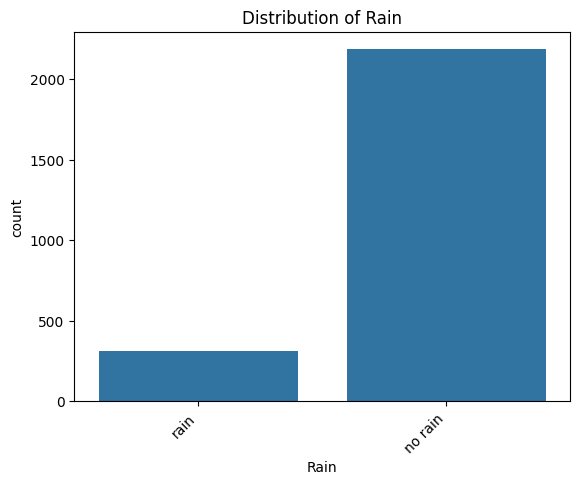

In [62]:
## Categorical Features: Analyze distribution and counts for categorical features
for feature in categorical_features:
    sns.countplot(x=dataset[feature])
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

To preprocess the weather forecast data, I scaled the numerical features (temperature, humidity, wind speed, cloud coverage, and pressure) using standardization. Finally, I encoded the categorical feature (rain) using label encoding, converting it into a numerical representation.

In [63]:
## Feature Scaling (Normalization/Standardization)
from sklearn.preprocessing import StandardScaler

numerical_features = dataset.select_dtypes(include=['number']).columns
scaler = StandardScaler()
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])

In [64]:
## Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder

categorical_features = dataset.select_dtypes(include=['object']).columns
for feature in categorical_features:
    le = LabelEncoder()
    dataset[feature] = le.fit_transform(dataset[feature])